# 🧩 Notebook 06: Multivariate Analysis with SciPy

In [1]:
# Setup and Imports

import pandas as pd
import numpy as np
from pathlib import Path
import sys
from scipy.stats import chi2

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from utils.sim_utils import (
    compute_mahalanobis_distances,
    evaluate_mahalanobis_outliers
)
from utils.viz_utils import (
    plot_covariance_heatmap,
    plot_mahalanobis_outliers,
    plot_mahalanobis_outliers_3d,
    plot_mahalanobis_distance_distribution,
    save_and_show_plot
)

# Constants
DATA_PATH = Path("../synthetic_data/exports")
EXPORT_PLOTS = Path("../exports/plots/06_multivariate_analysis")
EXPORT_TABLES = Path("../exports/tables/06_multivariate_analysis")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 🔹 Step 1: Load Multivariate Dataset

In [2]:
# Load Multivariate Dataset
df = pd.read_csv(DATA_PATH / "multivariate_gaussian.csv")
display(df.head())

,X1,X2,X3
0,-0.290244,0.340788,1.712120
1,-1.539065,-0.363648,1.174705
2,-1.523446,0.064490,0.418956
3,-0.717815,0.456167,2.020417
4,-1.020734,0.444667,3.403397


In [3]:
# Statistical description
display(df.describe())

,X1,X2,X3
count,500.000000,500.000000,500.000000
mean,-0.093465,0.872789,1.938548
std,0.951236,0.966788,0.957629
min,-2.853833,-2.009493,-0.746777
25%,-0.644856,0.194612,1.287295
50%,-0.103574,0.859425,2.006296
75%,0.516697,1.521567,2.616256
max,2.978718,4.427686,4.536505


## 🔹 Step 2: Covariance Matrix & Heatmap

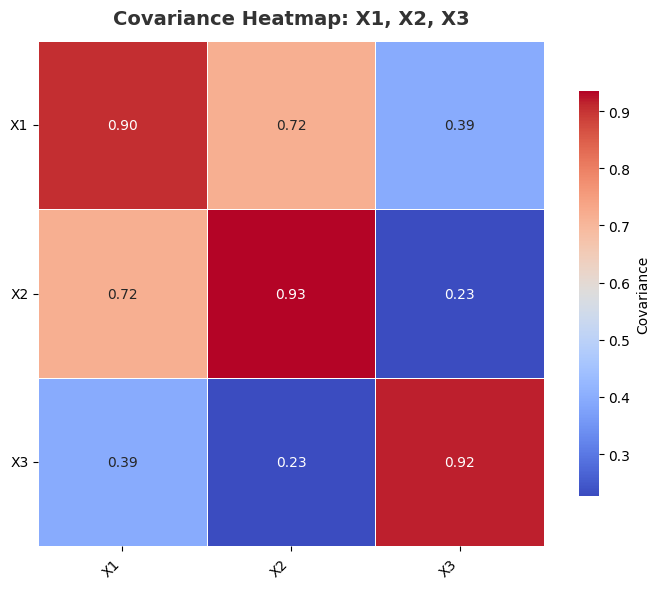

In [4]:
# Covariance Matrix & Heatmap
fig = plot_covariance_heatmap(df, title="Covariance Heatmap: X1, X2, X3")
save_and_show_plot(fig, EXPORT_PLOTS / "covariance_matrix.png")

## 🔹 Step 3: Compute Mahalanobis Distance for Outlier Detection

In [5]:
# Compute Mahalanobis distances
df['mahalanobis'] = compute_mahalanobis_distances(df)

# Export results
df.to_csv(EXPORT_TABLES / "step3_mahalanobis_distances.csv", index=False)

## 🔹 Step 4: Detect Outliers (Chi-Square Threshold)

In [6]:
# Evaluate outliers using Chi-Square threshold (alpha = 0.01)
mask_outliers = evaluate_mahalanobis_outliers(df['mahalanobis'], df_dim=df.shape[1]-1, alpha=0.01)

df['is_outlier'] = mask_outliers

# Export outlier table
df.to_csv(EXPORT_TABLES / "step4_mahalanobis_outliers_flagged.csv", index=False)

In [7]:
# % of outliers
outlier_percentage = mask_outliers.mean() * 100
print(f"Outliers Detected: {outlier_percentage:.2f}%")

Outliers Detected: 0.00%


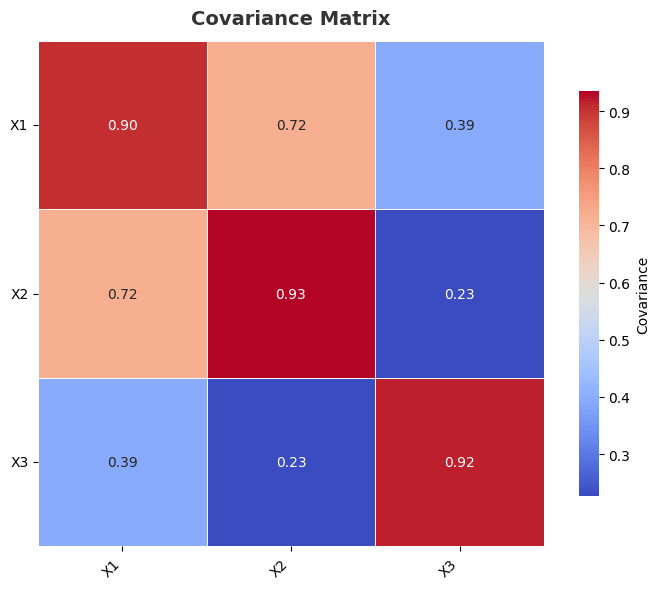

In [8]:
# Covariance Heatmap
heatmap_fig = plot_covariance_heatmap(df.drop(columns=['mahalanobis', 'is_outlier']), title="Covariance Matrix")
save_and_show_plot(heatmap_fig, EXPORT_PLOTS / "covariance_heatmap.png")

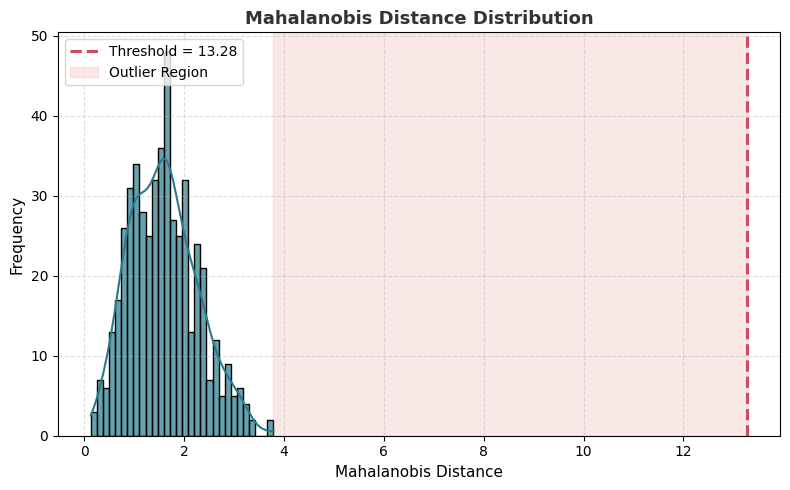

In [9]:
# Threshold for visualization
threshold = chi2.ppf(1 - 0.01, df.shape[1] - 1)

fig_dist = plot_mahalanobis_distance_distribution(
    df, distance_col="mahalanobis", threshold=threshold
)
save_and_show_plot(fig_dist, EXPORT_PLOTS / "mahalanobis_distance_distribution.png")

## 🔹 Step 5: Scatterplot with Outliers Highlighted

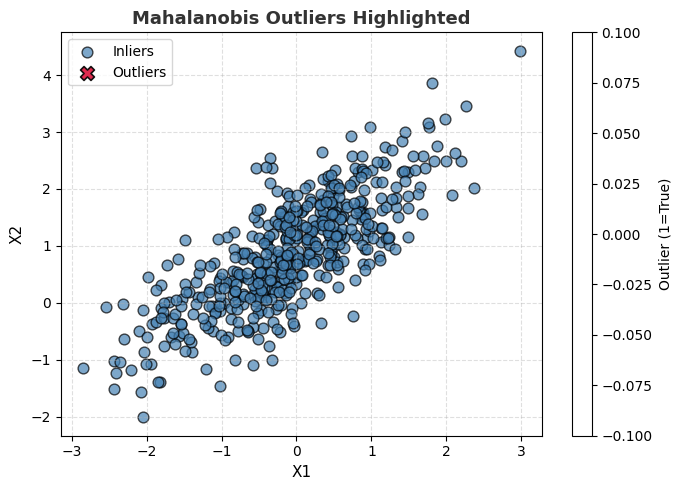

In [10]:
# Plot: X1 vs X2 with outliers highlighted
from utils.viz_utils import plot_mahalanobis_outliers
fig_outliers = plot_mahalanobis_outliers(df, x_col="X1", y_col="X2", outlier_col="is_outlier")
save_and_show_plot(fig_outliers, EXPORT_PLOTS / "mahalanobis_outliers_scatter.png")

## 🔹 Step 6: 3D Scatterplot Using Plotly

In [11]:
# 3D Scatterplot Using plotly
fig_3d = plot_mahalanobis_outliers_3d(df, x_col="X1", y_col="X2", z_col="X3", outlier_col="is_outlier")
fig_3d.write_html(EXPORT_PLOTS / "mahalanobis_outliers_3D.html")
fig_3d.show()

## 🔹 Step 7: Outlier Summary Table

In [12]:
outlier_summary = pd.DataFrame({
    "total_points": [len(df)],
    "outliers_detected": [df['is_outlier'].sum()],
    "threshold_alpha": [0.01],
    "percent_outliers": [outlier_percentage]
})


outlier_summary.to_csv(EXPORT_TABLES / "outlier_summary.csv", index=False)
display(outlier_summary)

,total_points,outliers_detected,threshold_alpha,percent_outliers
0,500,0,0.01,0.0


## 🧠 Key Takeaways
- Mahalanobis distance considers multivariate covariance and is scale-invariant.
- SciPy’s `chi2.ppf()` lets us statistically flag extreme points as outliers.
- This analysis is robust to correlation between variables, unlike Euclidean distance.

## ✅ Summary
In this notebook, we:

- Loaded a synthetic multivariate Gaussian dataset
- Visualized the covariance matrix via heatmap
- Computed Mahalanobis distances from the multivariate mean
- Identified outliers using a Chi-Square threshold
- Exported annotated results and visuals